In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('gapminder_full.csv')

In [ ]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [ ]:
total_unique_countries = df['country'].nunique()
total_unique_countries

142

In [ ]:
pivot_table = pd.pivot_table(data = df, index='continent',columns = 'year',values='life_exp',aggfunc='mean')
pivot_table

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [ ]:
data_2007 = df[df['year']==2007]
gdp_75_percentile = data_2007['gdp_cap'].quantile(0.75)
countries_above_75_percentile = data_2007[data_2007['gdp_cap']>gdp_75_percentile]['country'].unique()
countries_above_75_percentile

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong, China', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'United Kingdom',
       'United States'], dtype=object)

In [ ]:
df['Life_Exp_Range'] = pd.cut(df['life_exp'],bins=4,labels = ['Low','Medium','High','Very High'])
df.head(10)

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
5,Afghanistan,1977,14880372,Asia,38.438,786.113360,Medium
6,Afghanistan,1982,12881816,Asia,39.854,978.011439,Medium
7,Afghanistan,1987,13867957,Asia,40.822,852.395945,Medium
8,Afghanistan,1992,16317921,Asia,41.674,649.341395,Medium
9,Afghanistan,1997,22227415,Asia,41.763,635.341351,Medium


In [ ]:
countries_desc_gdp_2007 = data_2007.sort_values(by='gdp_cap',ascending=False)
top_5_countries_by_gdp = countries_desc_gdp_2007.head(5)
top_5_countries_by_gdp

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017
863,Kuwait,2007,2505559,Asia,77.588,47306.98978
1367,Singapore,2007,4553009,Asia,79.972,47143.17964
1619,United States,2007,301139947,Americas,78.242,42951.65309
755,Ireland,2007,4109086,Europe,78.885,40675.99635


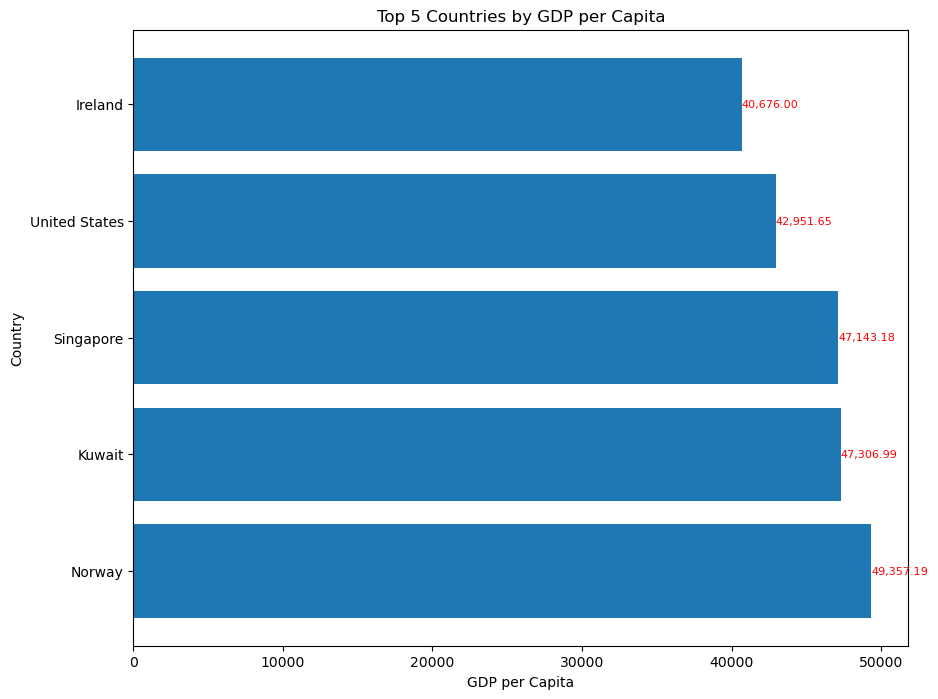

In [ ]:
plt.figure(figsize=(10, 8))
bars = plt.barh(y=top_5_countries_by_gdp['country'], width=top_5_countries_by_gdp['gdp_cap'])
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.title('Top 5 Countries by GDP per Capita')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y()+bar.get_height()/2,f'{bar.get_width():,.2f}',va='center',fontsize=8,color='red')
plt.show()



In [ ]:
pattern = r'^I.*a$'
matches = df[df['country'].str.match(pattern)]['country'].unique()
print(matches)

['India' 'Indonesia']


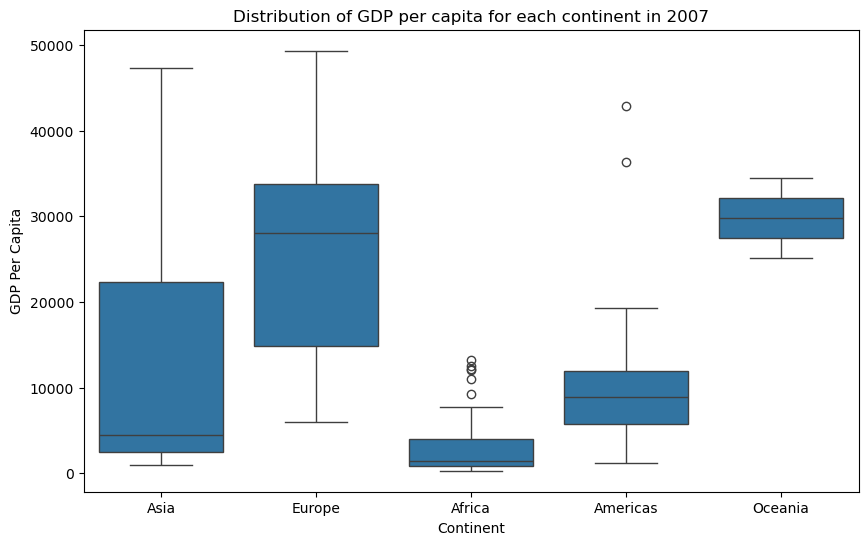

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(data = data_2007,x='continent',y='gdp_cap')
plt.title('Distribution of GDP per capita for each continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP Per Capita')
plt.show()

In [ ]:
country_over_80_life_exp = data_2007[data_2007['life_exp']>80][['country','continent']].reset_index()
country_over_80_life_exp.drop('index',axis = 1,inplace=True)
country_over_80_life_exp

,country,continent
0,Australia,Oceania
1,Canada,Americas
2,France,Europe
3,"Hong Kong, China",Asia
4,Iceland,Europe
5,Israel,Asia
6,Italy,Europe
7,Japan,Asia
8,New Zealand,Oceania
9,Norway,Europe


In [ ]:
df['year'] = pd.to_datetime(df['year'],format='%Y')
df['year'] = df['year'].dt.year
df['decades'] = (df['year']//10 * 10).astype(str)+'s'
df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range,decades
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low,1950s
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low,1950s
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low,1960s
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low,1960s
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low,1970s


In [ ]:
correlation_matrix = df[['gdp_cap','life_exp','population']].corr()
correlation_matrix

,gdp_cap,life_exp,population
gdp_cap,1.000000,0.583706,-0.025600
life_exp,0.583706,1.000000,0.064955
population,-0.025600,0.064955,1.000000


Text(0.5, 1.0, 'correlation between GDP per capita, life expectancy, and population')

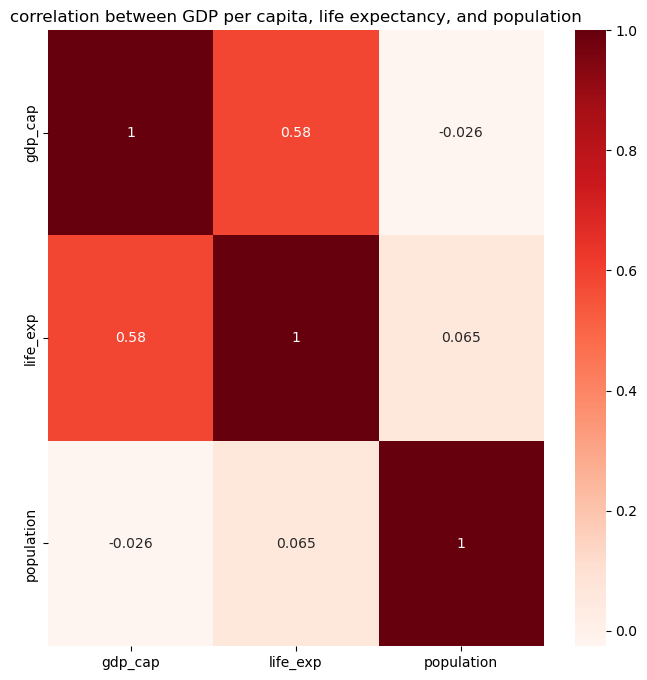

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data = correlation_matrix,annot = True,cmap='Reds')
plt.title('correlation between GDP per capita, life expectancy, and population')

In [ ]:
avg_life_exp = df.groupby('year')['life_exp'].mean().reset_index()

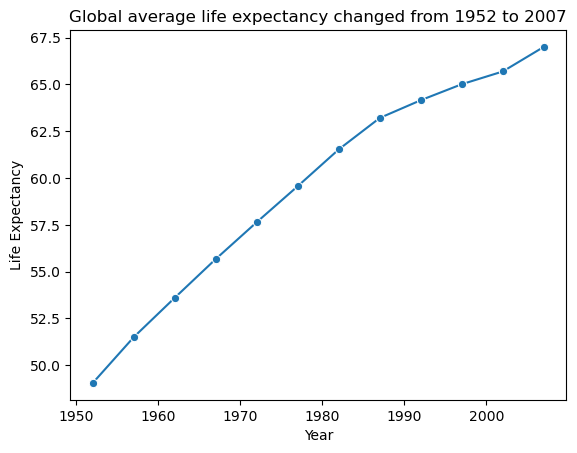

In [ ]:
sns.lineplot(data = avg_life_exp,x='year',y='life_exp',marker = 'o')
plt.title('Global average life expectancy changed from 1952 to 2007')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.show()

Question 12 - For the year 2007, analyze the relationship between life expectancy and GDP per capita.

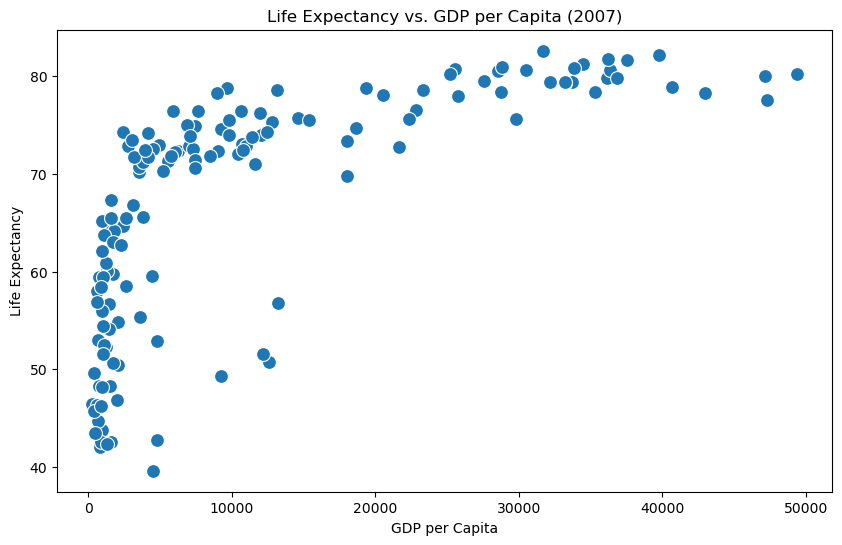

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_2007, x='gdp_cap', y='life_exp',  s=100)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. GDP per Capita (2007)')
plt.show()

In [ ]:
Continent_avg_data = data_2007.groupby('continent')['gdp_cap'].mean().reset_index()

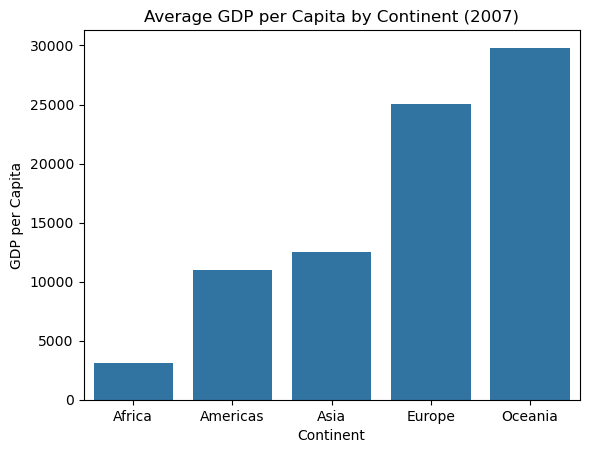

In [ ]:
sns.barplot(data=Continent_avg_data,x='continent',y='gdp_cap')
plt.title('Average GDP per Capita by Continent (2007)')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.show()

Text(0.5, 0, 'Country')

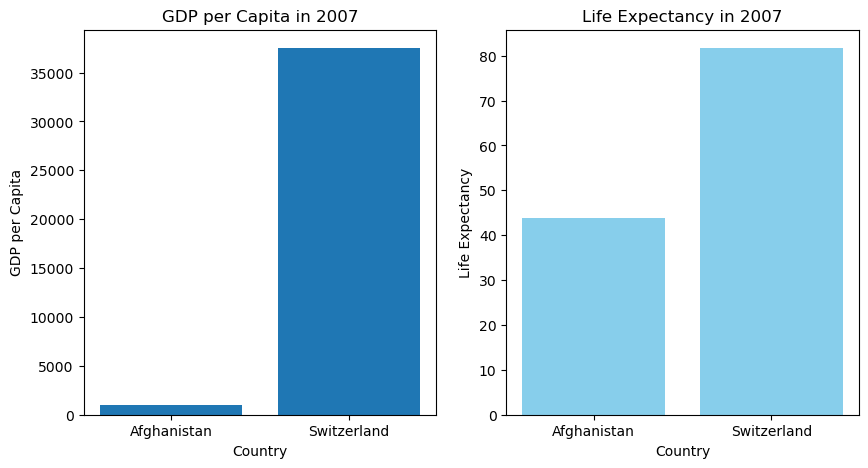

In [ ]:
afg_swi_country_2007 = data_2007[data_2007['country'].isin(['Afghanistan','Switzerland'])]
fig,grid = plt. subplots(1,2, figsize= (10,5))

grid [0]. bar(x=afg_swi_country_2007['country'], height=afg_swi_country_2007['gdp_cap'])
grid[0].set_title('GDP per Capita in 2007')
grid[0].set_ylabel('GDP per Capita')
grid[0].set_xlabel('Country')

grid [1]. bar(afg_swi_country_2007['country'], height=afg_swi_country_2007['life_exp'],color='skyblue')
grid[1].set_title('Life Expectancy in 2007')
grid[1].set_ylabel('Life Expectancy')
grid[1].set_xlabel('Country')



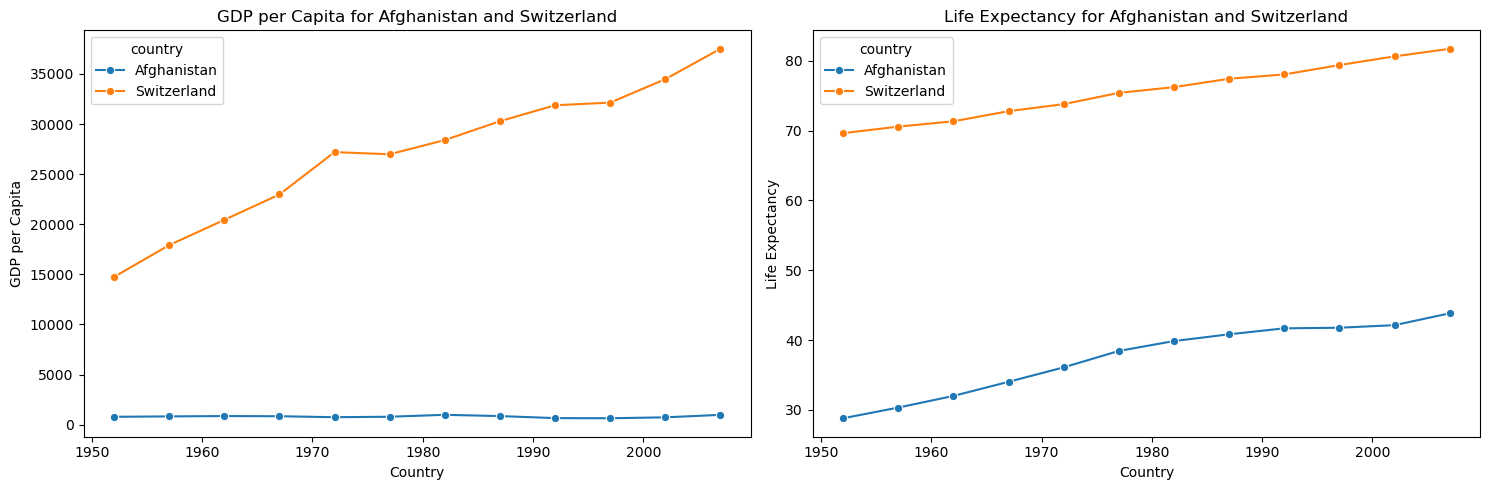

In [ ]:
#Line chart for all year
afg_swi_country_all = df[df['country'].isin(['Afghanistan','Switzerland'])]
fig,grid = plt. subplots(1,2, figsize= (15,5))

sns.lineplot(data =afg_swi_country_all, x = 'year', y = 'gdp_cap',hue = 'country',marker = 'o',ax = grid[0])
grid[0].set_title('GDP per Capita for Afghanistan and Switzerland')
grid[0].set_ylabel('GDP per Capita')
grid[0].set_xlabel('Country')

sns.lineplot(data =afg_swi_country_all, x = 'year', y = 'life_exp',hue = 'country',marker = 'o',ax = grid[1])
grid[1].set_title('Life Expectancy for Afghanistan and Switzerland')
grid[1].set_ylabel('Life Expectancy')
grid[1].set_xlabel('Country')

plt.tight_layout()
plt.show()